Import libraris     

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_incidents=pd.read_csv("../Files/Incidents.csv")


In [3]:
df_incidents.shape

(99999, 6)

In [102]:
df_incidents.head()

,Incidents,RouteID,IncidentType,Severity,Location,IncidentDate,Description,ResponseTime,DamageCost,InsuranceClaim
0,INC001,R001,Piracy,Medium,NaN,23-10-2022,NaN,2 hours,1000000.0,Yes
1,INC002,R001,Accident,Medium,NaN,26-01-2023,Offshore Oil Rig Mishaps,4 hours,500000.0,No
2,INC003,R001,Attacks,High,NaN,15-06-2023,NaN,1 hour,10000.0,No
3,INC004,R001,Delay,Medium,NaN,25-10-2023,NaN,1 hour,10000.0,No
4,INC005,R001,Piracy,High,NaN,20-07-2023,NaN,NaN,NaN,NaN


In [103]:
df_incidents.tail()

,Incidents,RouteID,IncidentType,Severity,Location,IncidentDate,Description,ResponseTime,DamageCost,InsuranceClaim
4274,INC4275,R700,Theft,Low,NaN,11-05-2023,Container theft,NaN,NaN,NaN
4275,INC4276,R700,Theft,Medium,NaN,23-09-2023,Cargo theft,NaN,NaN,NaN
4276,INC4277,R700,Delay,Medium,NaN,07-01-2024,NaN,NaN,NaN,NaN
4277,INC4278,R700,Accident,Low,NaN,01-10-2022,Offshore Oil Rig Mishaps,NaN,NaN,NaN
4278,NaN,R700,Attacks,High,NaN,31-01-2023,NaN,NaN,NaN,NaN


info() helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

In [104]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4279 entries, 0 to 4278
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Incidents       4278 non-null   object 
 1   RouteID         4279 non-null   object 
 2   IncidentType    4279 non-null   object 
 3   Severity        4279 non-null   object 
 4   Location        0 non-null      float64
 5   IncidentDate    4279 non-null   object 
 6   Description     1232 non-null   object 
 7   ResponseTime    12 non-null     object 
 8   DamageCost      12 non-null     float64
 9   InsuranceClaim  12 non-null     object 
dtypes: float64(2), object(8)
memory usage: 334.4+ KB


Check for Duplication
nunique() based on several unique values in each column and the data description, we can identify the continuous and categorical columns in the data. Duplicated data can be handled or removed based on further analysis

In [105]:
df_incidents.nunique()

Incidents         4278
RouteID            700
IncidentType         7
Severity             3
Location             0
IncidentDate       726
Description         11
ResponseTime         3
DamageCost           3
InsuranceClaim       2
dtype: int64

Missing Values Calculation
isnull() is widely been in all pre-processing steps to identify null values in the data

In our example, data.isnull().sum() is used to get the number of missing records in each column

In [106]:
df_incidents.isnull()

,Incidents,RouteID,IncidentType,Severity,Location,IncidentDate,Description,ResponseTime,DamageCost,InsuranceClaim
0,False,False,False,False,True,False,True,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,True,False,False,False
3,False,False,False,False,True,False,True,False,False,False
4,False,False,False,False,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
4274,False,False,False,False,True,False,False,True,True,True
4275,False,False,False,False,True,False,False,True,True,True
4276,False,False,False,False,True,False,True,True,True,True
4277,False,False,False,False,True,False,False,True,True,True


In [107]:
df_incidents.isnull().sum()

Incidents            1
RouteID              0
IncidentType         0
Severity             0
Location          4279
IncidentDate         0
Description       3047
ResponseTime      4267
DamageCost        4267
InsuranceClaim    4267
dtype: int64

calculate the percentage of missing values in each column

In [108]:
(df_incidents.isnull().sum()/(len(df_incidents)))*100

Incidents           0.023370
RouteID             0.000000
IncidentType        0.000000
Severity            0.000000
Location          100.000000
IncidentDate        0.000000
Description        71.208226
ResponseTime       99.719561
DamageCost         99.719561
InsuranceClaim     99.719561
dtype: float64

Find the categorical column and create the Unique column for these columns

In [109]:
distinct_severiry=df_incidents.Severity.drop_duplicates()

In [110]:
distinct_severiry_dict={}
for i in range(0,len(distinct_severiry)):
    distinct_severiry_dict[distinct_severiry.iloc[i]]=i+1
    
distinct_severiry_dict
    

{'Medium': 1, 'High': 2, 'Low': 3}

In [111]:
distinct_severiry_dict={'High':1,'Medium': 2,'Low':3}
df_incidents['severiry_id']=df_incidents['Severity'].map(distinct_severiry_dict)

df_incidents.head()

,Incidents,RouteID,IncidentType,Severity,Location,IncidentDate,Description,ResponseTime,DamageCost,InsuranceClaim,severiry_id
0,INC001,R001,Piracy,Medium,NaN,23-10-2022,NaN,2 hours,1000000.0,Yes,2
1,INC002,R001,Accident,Medium,NaN,26-01-2023,Offshore Oil Rig Mishaps,4 hours,500000.0,No,2
2,INC003,R001,Attacks,High,NaN,15-06-2023,NaN,1 hour,10000.0,No,1
3,INC004,R001,Delay,Medium,NaN,25-10-2023,NaN,1 hour,10000.0,No,2
4,INC005,R001,Piracy,High,NaN,20-07-2023,NaN,NaN,NaN,NaN,1


In [112]:
distinct_incidentType_dict={}
df_incidents_list=df_incidents["IncidentType"].drop_duplicates().sort_values()
for i in range(0,len(df_incidents_list)):
    distinct_incidentType_dict[df_incidents_list.iloc[i]]=i+1
    
distinct_incidentType_dict

df_incidents['IncidentType_id']=df_incidents['IncidentType'].map(distinct_incidentType_dict)

df_incidents.head()

,Incidents,RouteID,IncidentType,Severity,Location,IncidentDate,Description,ResponseTime,DamageCost,InsuranceClaim,severiry_id,IncidentType_id
0,INC001,R001,Piracy,Medium,NaN,23-10-2022,NaN,2 hours,1000000.0,Yes,2,5
1,INC002,R001,Accident,Medium,NaN,26-01-2023,Offshore Oil Rig Mishaps,4 hours,500000.0,No,2,1
2,INC003,R001,Attacks,High,NaN,15-06-2023,NaN,1 hour,10000.0,No,1,2
3,INC004,R001,Delay,Medium,NaN,25-10-2023,NaN,1 hour,10000.0,No,2,3
4,INC005,R001,Piracy,High,NaN,20-07-2023,NaN,NaN,NaN,NaN,1,5


In [113]:
df_incidents.drop(labels=["Description","ResponseTime","DamageCost","InsuranceClaim","Location"],axis=1,inplace=True)


In [114]:
df_incidents.head()

,Incidents,RouteID,IncidentType,Severity,IncidentDate,severiry_id,IncidentType_id
0,INC001,R001,Piracy,Medium,23-10-2022,2,5
1,INC002,R001,Accident,Medium,26-01-2023,2,1
2,INC003,R001,Attacks,High,15-06-2023,1,2
3,INC004,R001,Delay,Medium,25-10-2023,2,3
4,INC005,R001,Piracy,High,20-07-2023,1,5


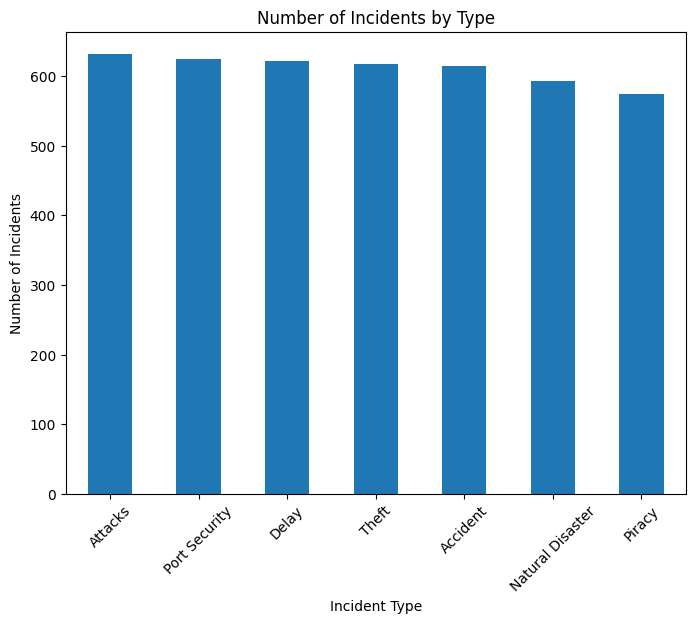

In [115]:
# Bar chart of incident types
plt.figure(figsize=(8, 6))
df_incidents['IncidentType'].value_counts().plot(kind='bar')
plt.title('Number of Incidents by Type')
plt.xlabel('Incident Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45) 
plt.show()

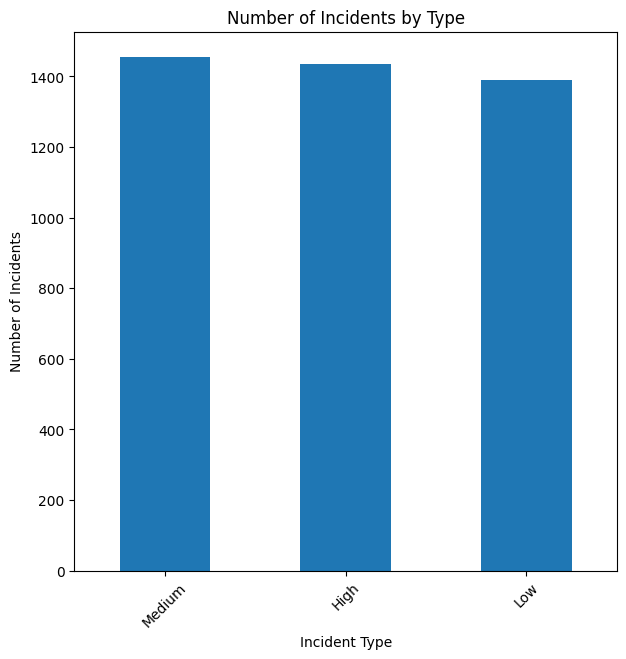

In [116]:
plt.figure(figsize=(7,7))
df_incidents['Severity'].value_counts().plot(kind='bar')
plt.title('Number of Incidents by Type')
plt.xlabel('Incident Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45) 
plt.show()

Incidents  RouteID  IncidentType   Severity  IncidentDate  severiry_id  IncidentType_id
INC4270    R700     Attacks        Medium    27-05-2023    2            2                  1
INC4271    R700     Delay          Medium    08-09-2023    2            3                  1
INC4272    R700     Port Security  Medium    06-02-2023    2            6                  1
INC4273    R700     Piracy         Medium    02-02-2024    2            5                  1
INC4274    R700     Delay          Medium    04-01-2023    2            3                  1
INC4275    R700     Theft          Low       11-05-2023    3            7                  1
INC4276    R700     Theft          Medium    23-09-2023    2            7                  1
INC4277    R700     Delay          Medium    07-01-2024    2            3                  1
INC4278    R700     Accident       Low       01-10-2022    3            1                  1
Name: count, dtype: int64